**6A.Clustering algorithms for unsupervised classification.**

Roll no.: 265

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers_dataset.csv')

df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


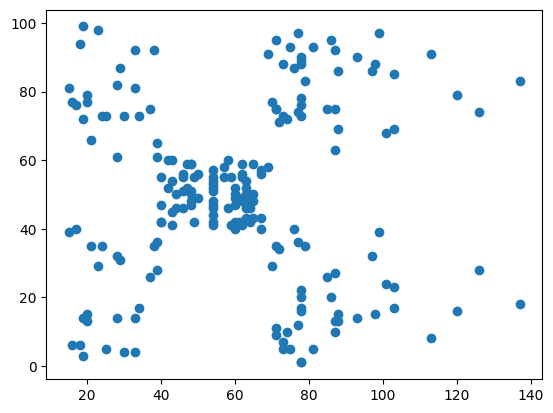

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [ ]:
# code for finding center of cluster
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [ ]:
cluster_number = model.fit_predict(X)


In [ ]:
len(cluster_number)

200

In [ ]:
c0 = X[cluster_number == 0]
c1 = X[cluster_number == 1]
c2 = X[cluster_number == 2]
c3 = X[cluster_number == 3]
c4 = X[cluster_number == 4]

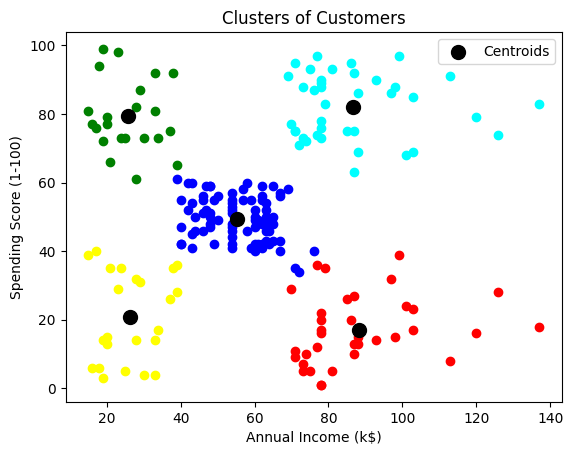

In [ ]:
plt.scatter(c0['Annual Income (k$)'], c0['Spending Score (1-100)'], color='red')
plt.scatter(c1['Annual Income (k$)'], c1['Spending Score (1-100)'], color='blue')
plt.scatter(c2['Annual Income (k$)'], c2['Spending Score (1-100)'], color='yellow')
plt.scatter(c3['Annual Income (k$)'], c3['Spending Score (1-100)'], color='cyan')
plt.scatter(c4['Annual Income (k$)'], c4['Spending Score (1-100)'], color='green')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
model.inertia_

44448.45544793369

In [ ]:
WCSS= []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(X)
  WCSS.append(model.inertia_)

  #K-mean: Inertia
  # Inertia measures how well a dataset was clustered by K-means

In [ ]:
WCSS
#WCSS within-cluster sum of square

[269981.28000000014,
 183116.4295463669,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 42702.1138987325,
 33870.80058476308,
 33608.60575419204,
 22926.862277257624,
 23087.880447330455]

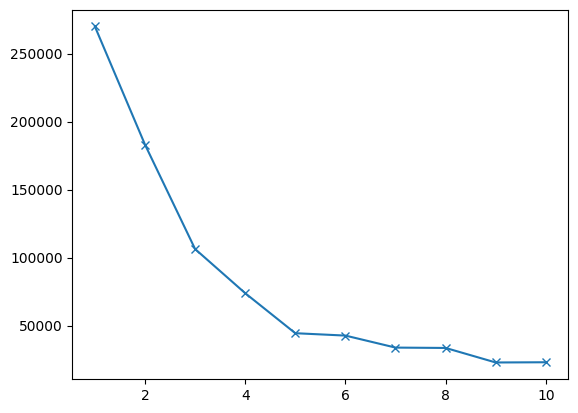

In [ ]:
plt.plot(range(1,11), WCSS,marker='x')
